<a href="https://colab.research.google.com/github/sudevansujit/Twitter_Sentiment_Analysis/blob/master/2_Twitter_NB_SVC_LR_1_6M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.6M Twitter Data Preprocessing

In [1]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [3]:
downloaded = drive.CreateFile({'id':'17ppoQR0Zhlp471Xp-6MUzncFAB8py_aS'}) # replace the id with id of file you want to access
downloaded.GetContentFile('cleaned.1600000.tweets.csv')

In [4]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_colwidth = 200

In [5]:
# col_names = ["id", "text", "sentiment"]
encode = "ISO-8859-1"
data = pd.read_csv('cleaned.1600000.tweets.csv', encoding = encode, header = 'infer',)
data.head()

,Unnamed: 0,text,new_target
0,509846,morning strict orders feet knit mind body feel like could much else hope well today,Negative
1,602894,emorethan,Negative
2,1384873,hacking cool tetris th birthday today yay someone elses tomorrow,Positive
3,874947,hey climb debuted vh top countdown congrads,Positive
4,458741,new post tomorrow breastfeeding journey ending,Negative


In [6]:
data.shape

(1600000, 3)

In [7]:
data.isnull().sum()

Unnamed: 0       0
text          8596
new_target       0
dtype: int64

### """There is 8596 missing data"""

In [8]:
data.dropna(axis = 0, inplace = True)
data.shape

(1591404, 3)

In [9]:
data.isnull().sum()

Unnamed: 0    0
text          0
new_target    0
dtype: int64

In [10]:
data.columns = ['id', 'text', 'target']
data.head()

,id,text,target
0,509846,morning strict orders feet knit mind body feel like could much else hope well today,Negative
1,602894,emorethan,Negative
2,1384873,hacking cool tetris th birthday today yay someone elses tomorrow,Positive
3,874947,hey climb debuted vh top countdown congrads,Positive
4,458741,new post tomorrow breastfeeding journey ending,Negative


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
pos_df = data[data['target'] == 'Positive']
pos_df.head()

,id,text,target
2,1384873,hacking cool tetris th birthday today yay someone elses tomorrow,Positive
3,874947,hey climb debuted vh top countdown congrads,Positive
5,1519936,meant pwned hes wimp lol guy fun insult everyone,Positive
7,1135223,one cry quot quot excellent movie lt cried kidding lol,Positive
8,1299581,hi angela try get beach least week special cafe sea shore like go,Positive


In [14]:
positive_words = list([j for i in pos_df['text'] for j in i.split()])
print(positive_words[:20])

['hacking', 'cool', 'tetris', 'th', 'birthday', 'today', 'yay', 'someone', 'elses', 'tomorrow', 'hey', 'climb', 'debuted', 'vh', 'top', 'countdown', 'congrads', 'meant', 'pwned', 'hes']


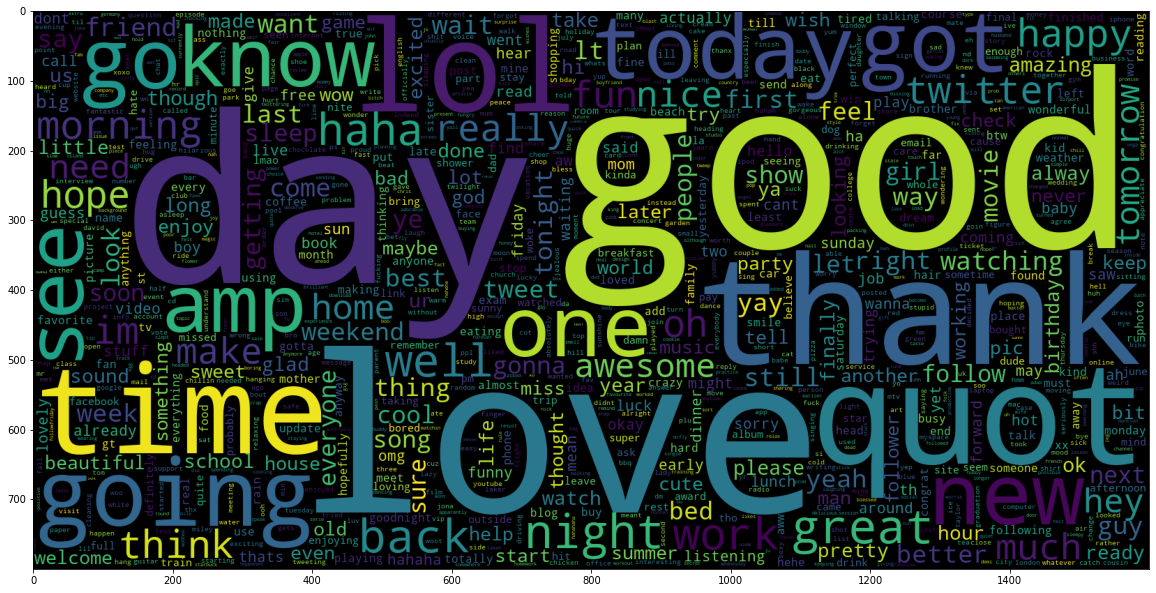

In [15]:
data_pos = positive_words
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

In [16]:
neg_df = data[data['target'] == 'Negative']
neg_df.head()

,id,text,target
0,509846,morning strict orders feet knit mind body feel like could much else hope well today,Negative
1,602894,emorethan,Negative
4,458741,new post tomorrow breastfeeding journey ending,Negative
6,378606,sorry still tired,Negative
9,218396,bad give new one,Negative


In [17]:
negative_words = list([j for i in neg_df['text'] for j in i.split()])
print(negative_words[:20])

['morning', 'strict', 'orders', 'feet', 'knit', 'mind', 'body', 'feel', 'like', 'could', 'much', 'else', 'hope', 'well', 'today', 'emorethan', 'new', 'post', 'tomorrow', 'breastfeeding']


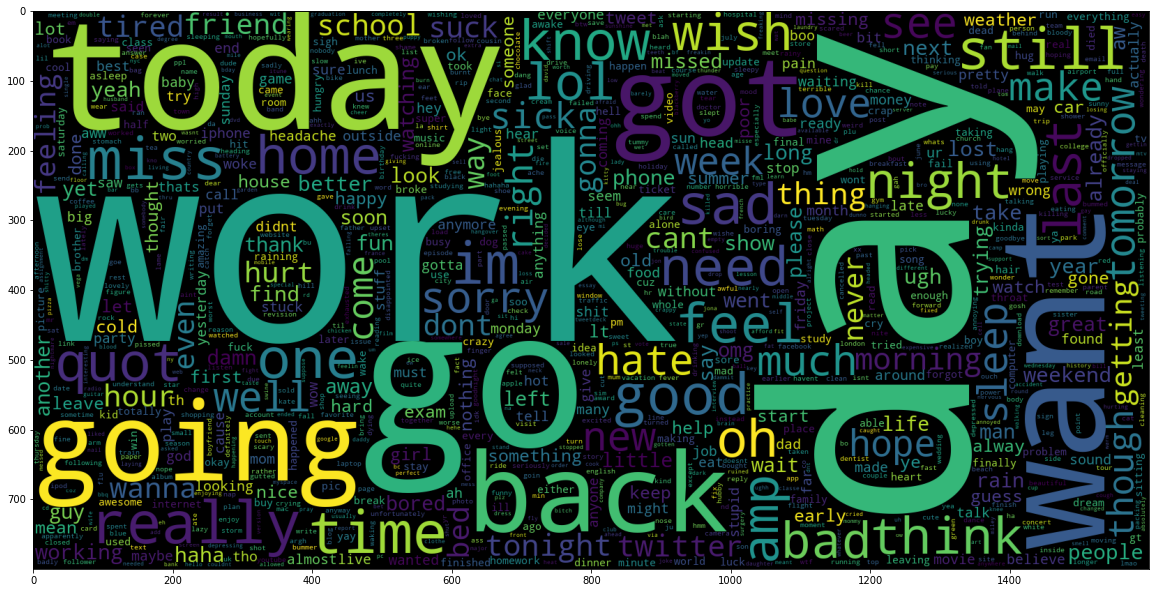

In [18]:
data_neg = negative_words
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [20]:
# Splitting the data
X = data['text']
y = data['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [22]:
print(X_train.shape, X_test.shape)

(1273123,) (318281,)


In [23]:
tfidf = TfidfVectorizer(ngram_range = (1,2), max_features = 50000)

In [25]:
tfidf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=50000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [26]:
X_train_1 = tfidf.transform(X_train)

In [30]:
X_test_1 = tfidf.transform(X_test)

In [34]:
def evaluate_model(model):
  y_pred = model.predict(X_test_1)
  print(classification_report(y_pred, y_test))
  print('*'*50)
  print("Accuracy Score :", accuracy_score(y_pred, y_test))
  print("*"*50)
  cnf_matrix = confusion_matrix(y_pred, y_test)
  labels = ['Negative', 'Positive']
  plt.figure(figsize = (8,8))
  sns.heatmap(cnf_matrix, 
              annot = True, 
              cmap = "Blues", 
              fmt = '',
              xticklabels = labels,
              yticklabels = labels)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
  plt.show()

BernoulliNB Classifier

In [32]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train_1, y_train)

BernoulliNB(alpha=2, binarize=0.0, class_prior=None, fit_prior=True)

              precision    recall  f1-score   support

    Negative       0.75      0.79      0.77    152527
    Positive       0.80      0.76      0.78    165754

    accuracy                           0.78    318281
   macro avg       0.78      0.78      0.78    318281
weighted avg       0.78      0.78      0.78    318281

**************************************************
Accuracy Score : 0.7758395882883364
**************************************************


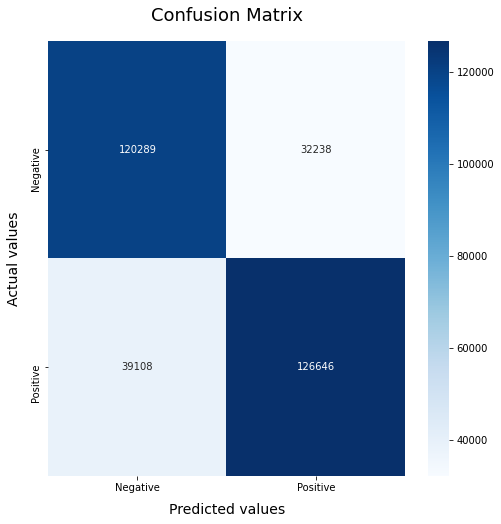

In [35]:
evaluate_model(BNBmodel)

MultinomialNB Classifier

In [40]:
mnb = MultinomialNB(alpha = 2, fit_prior = False)
mnb.fit(X_train_1, y_train)

MultinomialNB(alpha=2, class_prior=None, fit_prior=False)

              precision    recall  f1-score   support

    Negative       0.77      0.78      0.77    158307
    Positive       0.78      0.77      0.77    159974

    accuracy                           0.77    318281
   macro avg       0.77      0.77      0.77    318281
weighted avg       0.77      0.77      0.77    318281

**************************************************
Accuracy Score : 0.7742183793566063
**************************************************


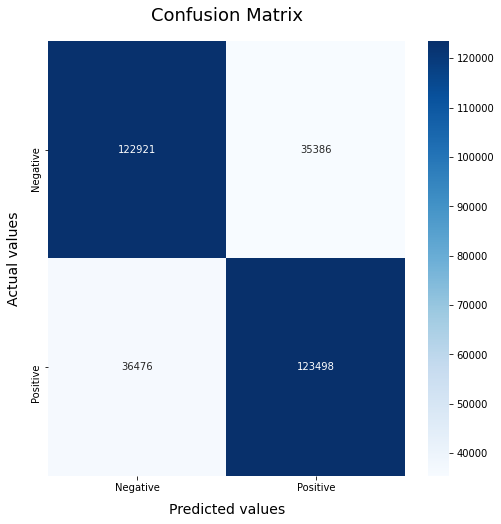

In [41]:
evaluate_model(mnb)

LinearSVC Classifier

In [42]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_1, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

              precision    recall  f1-score   support

    Negative       0.77      0.80      0.78    152461
    Positive       0.81      0.77      0.79    165820

    accuracy                           0.79    318281
   macro avg       0.79      0.79      0.79    318281
weighted avg       0.79      0.79      0.79    318281

**************************************************
Accuracy Score : 0.7872131858326448
**************************************************


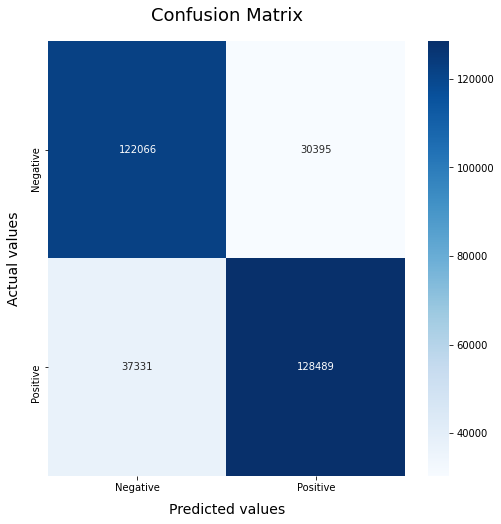

In [43]:
evaluate_model(SVCmodel)

LogisticRegression

In [44]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_1, y_train)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

    Negative       0.77      0.80      0.79    153452
    Positive       0.81      0.78      0.79    164829

    accuracy                           0.79    318281
   macro avg       0.79      0.79      0.79    318281
weighted avg       0.79      0.79      0.79    318281

**************************************************
Accuracy Score : 0.7899937476632284
**************************************************


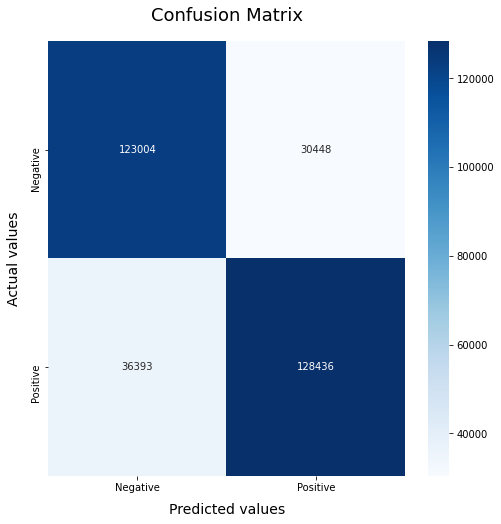

In [45]:
evaluate_model(LRmodel)

It can be seen that Logistic regression achieves highest of all ie 79% accuracy

In [46]:
"Thanks"

'Thanks'